# PaddleOPR

PaddleOPR is optical character recognition model using PaddlePaddle (Parallel Distributed Deep Learning) framework.

###OCR - Optical Character Recognition
Widely used in daily life, such as license plate recognition, bank card information technology, ID card information recognition, train ticket information recognition. In video scenes OCR technology is often used for automatic subtitle translation, content security monitoring or combined with visual features to complete tasks such as video understanding and video search.

###Model's Skeleton
* Model size is 8.6M
* Only **one** detection (4.1M) and **one** recognition model (4.5M)
* Support both Chiness and English
* Support text recognition in multiple directions such as tilt and vertical
* The average time for a single prediction pf T4 is only 60ms
* Support GPU and CPU
* Can run on all operation systems

**Text detection model uses the DB algorithm.
Text recognition model uses CRNN algorithm.**
> Both models use MobileNetv3 as the backbone network which can initially reduce the model size by more than 90%.

First, we're going to download paddlepaddle-gpu, paddleocr, and clone the Github repo of PaddleOCR for fonts.

In [ ]:
!pip install paddleocr==2.0.6

     |████████████████████████████████| 189 kB 9.4 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
     |████████████████████████████████| 28.2 MB 55 kB/s 
     |████████████████████████████████| 948 kB 56.9 MB/s 
     |████████████████████████████████| 12.5 MB 16 kB/s 
     |████████████████████████████████| 2.7 MB 51.0 MB/s 
     |████████████████████████████████| 123 kB 72.3 MB/s 
     |████████████████████████████████| 197 kB 70.9 MB/s 
     |████████████████████████████████| 190 kB 70.5 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 2.0 MB 41.9 MB/s 
     |████████████████████████████████| 68 kB 8.7 MB/s 
     |████████████████████████████████| 41 kB 766 kB/s 
     |████████████████████████████████| 1.9 MB 57.3 MB/s 
     |████████████████████████████████| 5.3 MB 57.8 MB/s 
     |████████████████████████████████| 636 kB 54.8 MB/s 
     |████████████████████████████████| 98 kB 10.9 MB/s 
     |████████████████████

In [ ]:
!pip install paddlepaddle-gpu

     |████████████████████████████████| 361.4 MB 23 kB/s 


In [ ]:
!paddleocr -h

usage: paddleocr [-h] [--use_gpu USE_GPU] [--ir_optim IR_OPTIM]
                 [--use_tensorrt USE_TENSORRT] [--gpu_mem GPU_MEM]
                 [--image_dir IMAGE_DIR] [--det_algorithm DET_ALGORITHM]
                 [--det_model_dir DET_MODEL_DIR]
                 [--det_limit_side_len DET_LIMIT_SIDE_LEN]
                 [--det_limit_type DET_LIMIT_TYPE]
                 [--det_db_thresh DET_DB_THRESH]
                 [--det_db_box_thresh DET_DB_BOX_THRESH]
                 [--det_db_unclip_ratio DET_DB_UNCLIP_RATIO]
                 [--use_dilation USE_DILATION]
                 [--det_east_score_thresh DET_EAST_SCORE_THRESH]
                 [--det_east_cover_thresh DET_EAST_COVER_THRESH]
                 [--det_east_nms_thresh DET_EAST_NMS_THRESH]
                 [--rec_algorithm REC_ALGORITHM]
                 [--rec_model_dir REC_MODEL_DIR]
                 [--rec_image_shape REC_IMAGE_SHAPE]
                 [--rec_char_type REC_CHAR_TYPE]
                 [--rec_batch_nu

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving food-labels.jpeg to food-labels.jpeg


In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 19262, done.
remote: Counting objects: 100% (940/940), done.
remote: Compressing objects: 100% (376/376), done.
remote: Total 19262 (delta 602), reused 875 (delta 559), pack-reused 18322
Receiving objects: 100% (19262/19262), 121.50 MiB | 35.24 MiB/s, done.
Resolving deltas: 100% (12887/12887), done.


In [ ]:
def image_to_text(img_path, saved_image_name):

  from paddleocr import PaddleOCR, draw_ocr

  ocr = PaddleOCR(lang="en")
  img_path = img_path
  result = ocr.ocr(img_path)

  for line in result:
    print(line)

  from PIL import Image

  image = Image.open(img_path).convert('RGB')
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
  im_show = draw_ocr(image, boxes, txts, scores, font_path="PaddleOCR/doc/fonts/korean.ttf")
  im_show = Image.fromarray(im_show)
  im_show.save(saved_image_name)

In [ ]:
image_to_text("/content/ingredients.jpeg", "result_one.jpg")

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/root/.paddleocr/2.1/rec/en', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_ppocr_mobile_v2.0_det_infer.tar to /root/.paddleocr/2.1/det/en/en_ppocr_mobile

100%|██████████| 3.16M/3.16M [00:07<00:00, 407kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_infer.tar to /root/.paddleocr/2.1/rec/en/en_number_mobile_v2.0_rec_infer.tar


100%|██████████| 2.70M/2.70M [00:08<00:00, 333kiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/2.1/cls/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:07<00:00, 206kiB/s]


[2021/07/23 12:21:32] root INFO: dt_boxes num : 10, elapse : 9.365344285964966
[2021/07/23 12:21:32] root INFO: rec_res num  : 10, elapse : 0.037806034088134766
[[[168.0, 4.0], [414.0, 62.0], [408.0, 85.0], [163.0, 26.0]], ('CyclopentasiloxaneSa ', 0.9639251)]
[[[272.0, 2.0], [411.0, 30.0], [406.0, 54.0], [267.0, 27.0]], ('ingredients', 0.95013547)]
[[[162.0, 29.0], [404.0, 88.0], [399.0, 110.0], [156.0, 51.0]], ('C12-15AlkylBenzoate.PPG-14', 0.9781972)]
[[[155.0, 57.0], [391.0, 115.0], [386.0, 137.0], [149.0, 79.0]], ('Butyl EtherydrogenatedCastor', 0.9556516)]
[[[149.0, 84.0], [371.0, 139.0], [365.0, 161.0], [143.0, 106.0]], ('Oil.Dimethicone.Polyethylene', 0.97206527)]
[[[141.0, 113.0], [383.0, 170.0], [377.0, 192.0], [136.0, 135.0]], ('Fragrance Parfum).Steareth-100', 0.9473023)]
[[[135.0, 138.0], [359.0, 194.0], [354.0, 216.0], [130.0, 160.0]], ('Helianthus AnnuusSunflower', 0.96970475)]
[[[129.0, 166.0], [228.0, 189.0], [222.0, 212.0], [124.0, 189.0]], ('Seed Oil.BHT', 0.96856564

In [ ]:
image_to_text("/content/food-labels.jpeg", "result_two.jpg")

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/root/.paddleocr/2.1/rec/en', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/07/23 12:24:17] root INFO: dt_boxes num : 42, elapse : 0.048926353454589844
[2021/07/23 12:24:17] root INFO: rec_res num  : 42, elapse : 0.040

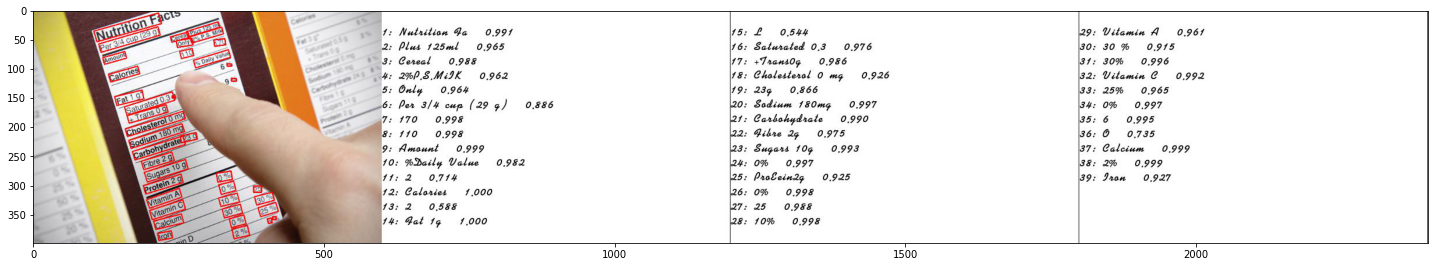

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (25, 25))
image = mpimg.imread("result_two.jpg")
plt.imshow(image)
plt.show()

Let's create two functions to upload, show, and download images.

In [ ]:
def display_results(img_path):
  plt.figure(figsize = (25, 25))
  image = mpimg.imread(img_path)
  plt.imshow(image)
  plt.show()

def download_results(path):
  from google.colab import files
  files.download(path)

def upload():
  from google.colab import files
  uploaded = files.upload() 

In [ ]:
upload()

Saving receipt.jpeg to receipt.jpeg


Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/2.1/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/2.1/det/en', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='./ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/root/.paddleocr/2.1/rec/en', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
[2021/07/23 12:40:27] root INFO: dt_boxes num : 32, elapse : 0.06450772285461426
[2021/07/23 12:40:27] root INFO: rec_res num  : 32, elapse : 0.0427

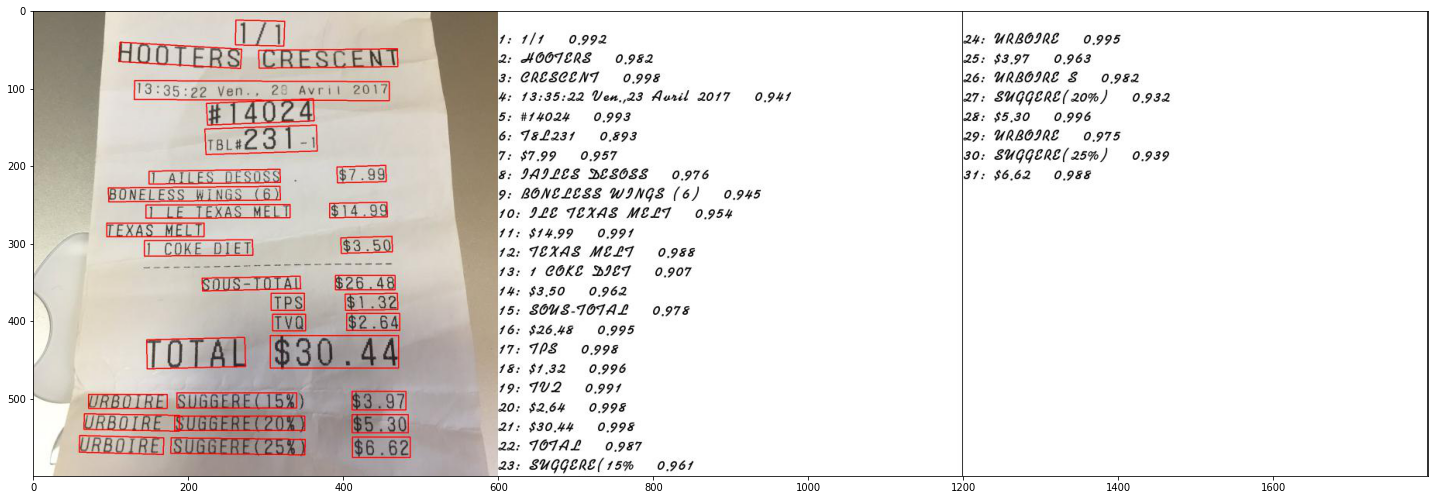

In [ ]:
image_to_text("receipt.jpeg", "result_three.jpg")
display_results("result_three.jpg")

In [ ]:
download_results("result_three.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resources
1. https://t.co/WcwtIXdjcr?amp=1
2. https://t.co/G9HxBdWn5D?amp=1
3. PaddleOCR Github repo